<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a><br>
<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

***
[Borrow Fees Alpha](Introduction.ipynb) › Part 2: Exploratory Data Analysis
***

# Exploratory Data Analysis

With an alternative data source like borrow fees, exploratory data analysis (EDA) is a good first step. In this notebook, we will run a Pipeline to get an overview of the distribution of borrow fees.

The Pipeline has one column, the borrow fee. For this tutorial, we choose to limit our universe to common stocks.

In [1]:
from zipline.pipeline import Pipeline, ibkr, master

universe = master.SecuritiesMaster.usstock_SecurityType2.latest.eq("Common Stock")

pipeline = Pipeline(
    columns={
        "borrow_fee": ibkr.BorrowFees.FeeRate.latest,
    },
    initial_universe=universe
)

Next, we run the pipeline for a single date.

In [2]:
from zipline.research import run_pipeline, use_bundle

use_bundle("usstock-1d-bundle")

results = run_pipeline(pipeline, start_date="2024-01-05", end_date="2024-01-05")

Let's peek at the results. Borrow fees are quoted as the annualized interest rate that is charged to the borrower of the shares. For example, 0.25 corresponds to an annualized interest rate of 0.25%; 5.7 corresponds to an annualized interest rate of 5.7%.

In [3]:
results.head()

borrow_fee
date       asset                                    
2024-01-05 Equity(FIBBG000C2V3D6 [A])         0.2918
           Equity(FIBBG00B3T3HD3 [AA])        0.2843
           Equity(FIBBG00VR487K7 [ORGN])      0.5998
           Equity(FIBBG005P7Q881 [AAL])       0.2526
           Equity(FIBBG003PNL136 [AAMC])      5.7020

Next we use pandas' `describe()` method to look at the distribution. Most borrow fees are low: the minimum borrow fee is 0.25%, and the median is below 1%. However, at the extreme end of the distribution, borrow fees can be very high: the maximum on this date is 860%. 

In [4]:
results.describe()

,borrow_fee
count,4939.000000
mean,17.077866
std,54.938754
min,0.250000
25%,0.398650
50%,0.704100
75%,7.842400
max,860.538900


Let's view a histogram of the distribution. Because borrow fees have an extremely large range, we clip high borrow fees at 10 to make the histogram easier to view. The histogram reveals that most stocks cluster at the low end of the distribution (easy to borrow with low borrow fees), but a sizable number of stocks have borrow fees in excess of 10% annualized.

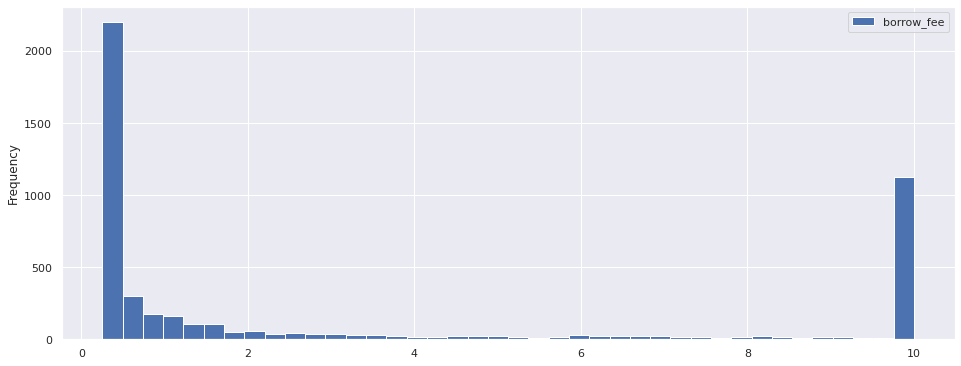

In [5]:
results.loc[results.borrow_fee > 10, "borrow_fee"] = 10
results.plot.hist(bins=40);

***

## *Next Up*

Part 3: [Alphalens Analysis](Part3-Alphalens-Borrow-Fees.ipynb)